<a href="https://colab.research.google.com/github/jfaraudo/Schrodinger_Numerical/blob/main/SquarePotential/squarewell_infinite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Particle in a 1D Box**

Numerical solution particle in a box (infinite potential barriers in the box edges).
The code assumed the particle is an electron and we use Atomic Units.

We start importing libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We define a function with the potential for the Schrödinger Equation. In this case is zero everywhere but it can be modified easily by any function as you like:

In [ ]:
#Potential as a function of position
def getV(x):
    potvalue = 0.0
    return potvalue

And now we define a function that calculates the matrix (denoted by F in the theoretical derivation) that encodes the Schrödinger Equation in finite diference form for n points from 0 to n-1

In [ ]:
#Discretized Schrodinger equation in n points (FROM 0 to n-1)
def Eq(n,h,x):
    F = np.zeros([n,n])
    for i in range(0,n):
        F[i,i] = -2*((h**2)*getV(x[i]) + 1)
        if i > 0:
           F[i,i-1] = 1
           if i < n-1:
              F[i,i+1] = 1
    return F

Up to now, the code does nothing explicitly. We have just defined how to calculate the potential and how to calculate the matrix F

Let us now start the numerical solution, entering the parameters that we need: the discretization h and the size of the box.

In [ ]:
# Interval for calculating the wave function [-L/2,L/2]
L = 10
xlower = -L/2.0
xupper = L/2.0

#Discretization options
h = 0.01  #discretization in space

#Create coordinates at which the solution will be calculated
x = np.arange(xlower,xupper+h,h)
#grid size (how many discrete points to use in the range [-L/2,L/2])
npoints=len(x)

print("Using",npoints, "grid points.")

Using 1001 grid points.


Now we can calculate F explicitly and diagonalize. The result of the diagonalization is **not ordered** so we have to order the results (energies and wavefunctions) by energy values.

In [ ]:
#Calculation of discrete form of Schrodinger Equation and diagonalization
F=Eq(npoints,h,x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Order results by eigenvalue
# w ordered eigenvalues and vs ordered eigenvectors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:,idx]

#Energy Level
E = - w/(2.0*h**2)

Print **Energy Results** and compare with Exact analytical result:

In [ ]:
#Energy Levels
E = - w/(2.0*h**2)
for k in range(0,5):
  E_exact=(float(k+1)*(np.pi))**2.0/(2.0*L*L)
  print("n=",k,", E(numeric)=%.4f" %E[k],', E(exact)='+'{:.4f}'.format(E_exact))

n= 0 , E(numeric)=0.0492 , E(exact)=0.0493
n= 1 , E(numeric)=0.1970 , E(exact)=0.1974
n= 2 , E(numeric)=0.4432 , E(exact)=0.4441
n= 3 , E(numeric)=0.7880 , E(exact)=0.7896
n= 4 , E(numeric)=1.2312 , E(exact)=1.2337


Now let us show the Wavefunctions obtained in the diagonalization process

Plotting


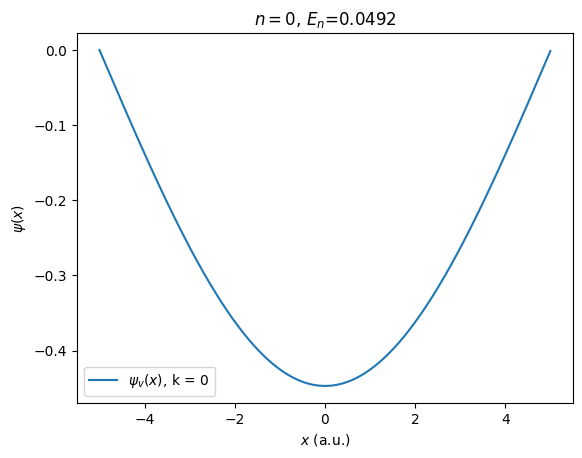

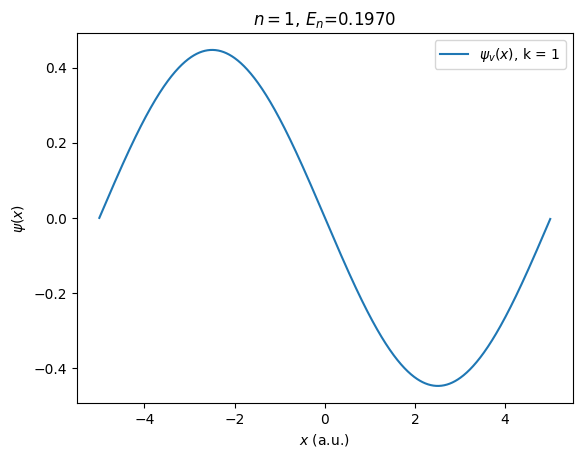

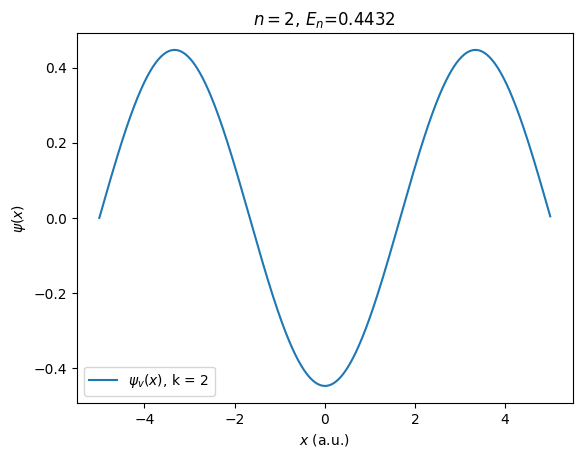

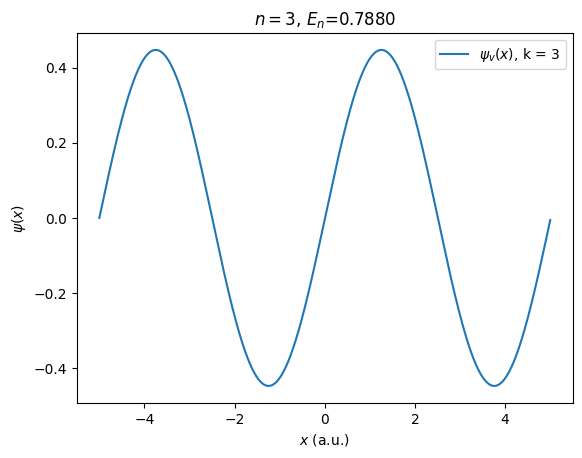

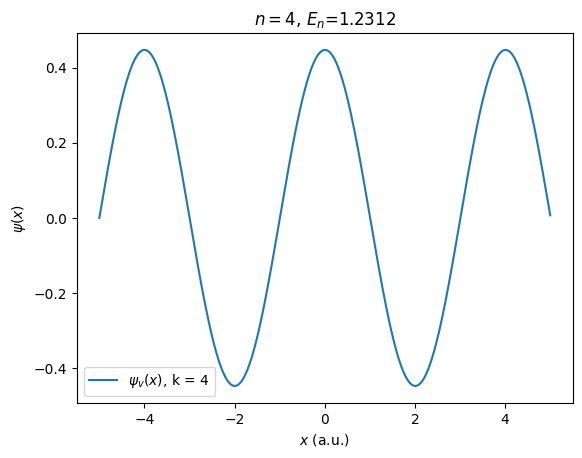

Bye


In [ ]:
#Init Wavefunction (empty list with npoints elements)
psi = [None]*npoints

#Calculation of normalised Wave Functions
for k in range(0,len(w)):
	psi[k] = vs[:,k]
	integral = h*np.dot(psi[k],psi[k])
	psi[k] = psi[k]/integral**0.5

#Plot Wave functions
print("Plotting")

#v = int(input("\n Quantum Number (enter 0 for ground state):\n>"))
for v in range(0,5):
	plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
	plt.title(r'$n=$'+ str(v) + r', $E_n$=' + '{:.4f}'.format(E[v]))
	plt.legend()
	plt.xlabel(r'$x$ (a.u.)')
	plt.ylabel(r'$\psi(x)$')
	plt.show()

print("Bye")
